In [3]:
#To analyse the sanity of movie ratings data from the "Fadango" website.
#This analysis is done to check the honesty in displaying ratings after "Walt Hicke" Analysis 
#Reference:https://fivethirtyeight.com/features/fandango-movies-ratings/
#Fadango Website argued they had a bug in their system of rounding up the ratings like if it is 4.1 to 5 stars

#The distribution was based on the relative frequencies(% of unique movie ratings) of the movie ratings

#Walt Hickey Data set analysi :https://github.com/fivethirtyeight/data/tree/master/fandango
#Movie ratings for 2016 and 2017 :https://github.com/mircealex/Movie_ratings_2016_17
import pandas as pd
fandango_rating = pd.read_csv('fandango_score_comparison.csv')
latest_rating = pd.read_csv('movie_ratings_16_17.csv')
fandango_rating.head()
#Check for the data dictionary for the datasets in the github.


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
latest_rating.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
#Now to extract only the columns needed for our analysis
previous_rating = fandango_rating[['FILM','Fandango_Stars','Fandango_Ratingvalue',
                                   'Fandango_votes','Fandango_Difference']].copy()

In [6]:
new_rating = latest_rating[['movie','year','fandango']].copy()

In [7]:
previous_rating.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [8]:
new_rating.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [13]:
#Since the sampling is not random,the population chosen is not good sample representativity,the goal of this analysis is changed to compare
#the Fandango's ratings for popular movies in 2015 and Fandangos  ratings for popular movies in 2016
#Thus Finally we are going to analyse the popular movie Fandango ratings for 2015 and 2016 alone 


#Popular movie means movies with more than 30 fan ratings
fandango_popular = sum(previous_rating['Fandango_votes'] < 30)
fandango_popular
#So our sample with the first data set has popular movies

0

In [15]:
#Isolate the samples with the movies in 2015 and 2016 in 2 seperate data sets.
#Create a year columnto isolate movies in 2015
previous_rating['Year'] = previous_rating['FILM'].str[-5:-1]
previous_rating.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [19]:
#Fandango 2015 year popular movies
previous_rating['Year'].value_counts()
rating_2015 = previous_rating[previous_rating['Year'] == '2015'].copy()
rating_2015['Year'].value_counts()
#Both the 'Year'Columns has same unique values ,so rightly isolated.

2015    129
Name: Year, dtype: int64

In [23]:
#Fandango 2016 year popular movies
rating_2016 = new_rating[new_rating['year'] == 2016].copy()
rating_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

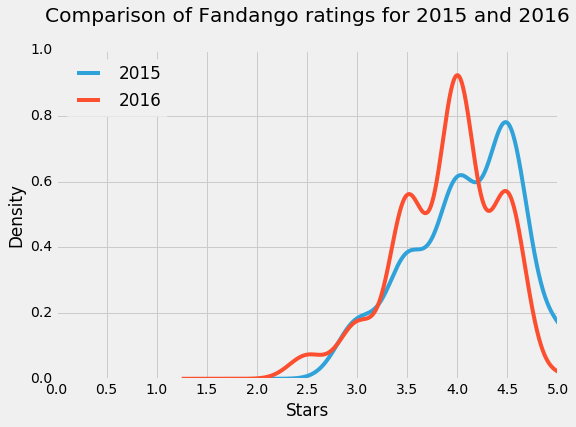

In [28]:
#Now to compare the two data sets  with their distribution at a high level ,draw kde for each sample
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')
rating_2015['Fandango_Stars'].plot.kde(label= '2015',legend = True,figsize = (8,5.5))
rating_2016['fandango'].plot.kde(label= '2016',legend = True)
plt.title("Comparison of Fandango ratings for 2015 and 2016",y = 1.07)
plt.xlabel('Stars')
plt.xlim(0,5) 
plt.xticks(arange(0,5.1,.5))
plt.show()

In [29]:
#Both the distributions are leftly skewed
#2016 ratings arelower rated suggesting the ratings aree slightly lower than 2015


In [30]:
#To examine the relative frequency(since the numbers are not same in both) distributions of two above distributions
rating_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() *100


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [32]:
rating_2016['fandango'].value_counts(normalize = True).sort_index() *100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [33]:
#Yes ,there is a difference between the two distributions ratings 
#After the article was published in 2015 ,the  5 star ratings are heavily reduced comapred to 2015
#Also the minimu rating in 2016 is 2.5 as comapred to 3 in 2015

In [38]:
#Summary statistics for 2015 and 2016 movies
rating_2015_mean =rating_2015['Fandango_Stars'].mean()
rating_2016_mean =rating_2016['fandango'].mean()
print(rating_2015_mean)
print(rating_2016_mean)

4.0852713178294575
3.887434554973822


In [40]:
rating_2015_median =rating_2015['Fandango_Stars'].median()
rating_2016_median =rating_2016['fandango'].median()
print(rating_2015_median)
print(rating_2016_median)

4.0
4.0


In [43]:
rating_2015_mode= rating_2015['Fandango_Stars'].mode()[0]
# the output of Series.mode() is a bit uncommon
rating_2016_mode = rating_2016['fandango'].mode()[0]

In [44]:
summary = pd.DataFrame()
summary['2015'] = [rating_2015_mean, rating_2015_median,rating_2015_mode]
summary['2016'] = [rating_2016_mean, rating_2016_median,rating_2016_mode]
summary.index = ['mean', 'median', 'mode']
summary


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


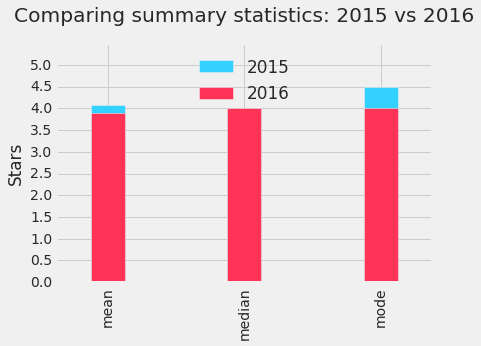

In [53]:
#To generate bar plot for the summary statistics
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#33D1FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#FF3358', align = 'center', label = '2016', width = .25)
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.legend(framealpha = 0, loc = 'upper center')
plt.ylabel('Stars')

In [54]:
#Median is same for both the distributions 
#Mean for ratings 2015 is higher than 2016
#The analysis shows the ratings are much better than 2015
